In [168]:
import pretty_midi
import numpy as np
import librosa
import matplotlib.pyplot as plt

frame_rate = 31.25

pm = pretty_midi.PrettyMIDI('midi-folder/midi-test.mid')
print(f"duration - {pm.get_end_time()}")

def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))
    
# plt.figure(figsize=(12, 5))
# plot_piano_roll(pm, 14, 124)

duration - 19.970158820764798


In [169]:
def create_labels(pm, frame_rate):
    num_frames = int(pm.get_end_time() * frame_rate)
    print(num_frames)
    labels = np.zeros((88, num_frames), dtype=int)

    for frame_idx in range(num_frames):
        frame_time = frame_idx/frame_rate
        for note in pm.instruments[0].notes:
            if note.start <= frame_time < note.end:
                note_index = note.pitch - 21
                labels[note_index, frame_idx] = 1
    
    return labels

labels = create_labels(pm, frame_rate)
len(labels)

624


88

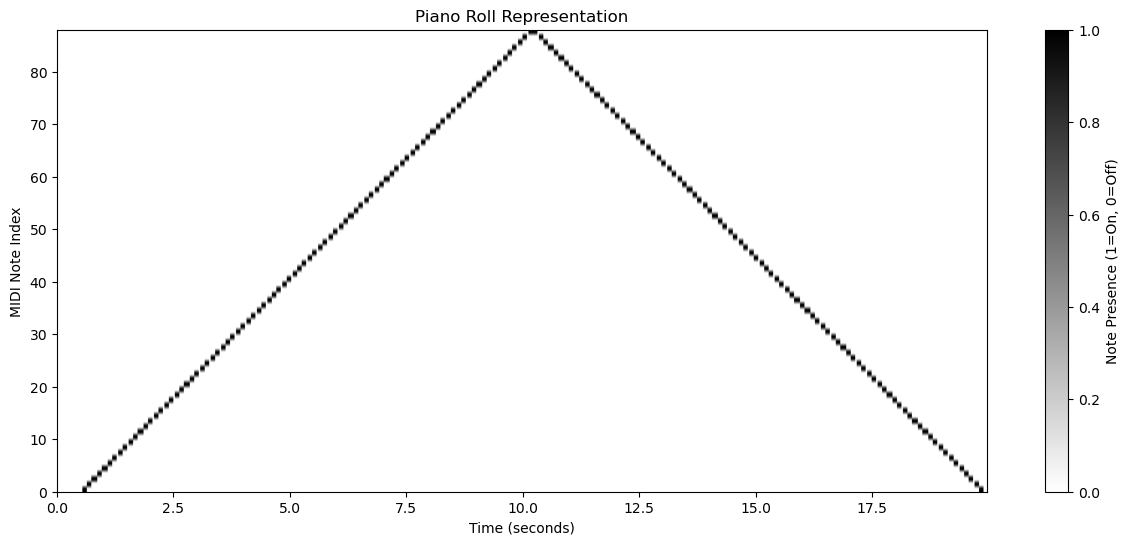

In [170]:
def plot_piano_roll(labels, frame_rate, pm):
    num_frames = labels.shape[1]
    duration_in_seconds = num_frames / frame_rate

    plt.figure(figsize=(15, 6))
    plt.imshow(labels, cmap='binary', aspect='auto', origin='lower', extent=[0, pm.get_end_time(), 0, 88])  # Ustawienie extent
    plt.xlabel('Time (seconds)')
    plt.ylabel('MIDI Note Index')
    plt.title('Piano Roll Representation')
    plt.colorbar(label='Note Presence (1=On, 0=Off)')
    plt.show()

# Wywołanie funkcji plot_piano_roll z zakresem klatek i czasem trwania
plot_piano_roll(labels, frame_rate, pm)
